Columns: <br>
-Identification <br>
-Parameters (Teff logg) <br>
-Observation time <br>
-Number of observations? <br>
-Number of flares <br>
-Longest/shortest flare duration <br>
-Highest/lowest percentage increase

In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# the file name in the quotation marks will need to be changed based on where it is in your computer and what you saved it as
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\\restart\k2_flare_data.csv")

In [3]:
df['TIC_ID'] = 'TIC ' + df['TIC_ID'].astype(str)

In [4]:
columns = ['EPIC_ID', 'TIC_ID', 'Teff', 'logg', 'Flare #', 'Observation time', 'Average flare duration', 'Longest flare duration', 'Shortest flare duration', 'Average percentage increase', 'Highest percentage increase', 'Lowest percentage increase']

info = pd.DataFrame(columns=columns)

attribute = []
type = []

for i in range(100):
        
    try:

        # call a lightcurve from MAST with a respective EPIC ID
        flc = from_mast(f"{df['z'][i]}", mode="LC", mission="K2")

        flare_total = 0
        observation = 0
        increase = []
        duration = []

        # this is our workaround for the multiple observations issue. if flc is a list (meaning there were multiple observations) then a new loop is created. if it is not a list, we proceed as normal
        if type(flc) != list:

            # remove all the 0 values from the light curve; will leave most light curves unaffected
            flc = flc[flc['flux'] != 0]

            flc_new = flc.detrend("savgol")
            flare = flc_new.find_flares(N1=3,N2=3,N3=4)

            flare_total = len(flare.flares)
            observation = flc_new.time.value[-1]-flc_new.time.value[0]
            increase = (flare.flares['ampl_rec']*100).astype(float).tolist()
            duration = (flare.flares['tstop']-flare.flares['tstart']).astype(float).tolist()

            # 
            if flare_total == 0:
                increase = [0]
                duration = [0]

            # this makes a new array with the values we want in our respective columns
            data = np.array([df['EPIC_ID'][i], df['TIC_ID'][i], df['Teff'][i], df['logg'][i], flare_total, observation, np.mean(duration), max(duration), min(duration), np.mean(increase), max(increase), min(increase)])
            
            # this inserts our new "data" array into the end of the data frame we made earlier. info.loc[len(info)] is "finding the location of the length" of our data frame
            info.loc[len(info)] = data
        else:

            for j in range(len(flc)):
                flc_j = flc[j]
                flc_no_0 = flc_j[flc_j['flux'] != 0]
                flc_new = flc_no_0.detrend("savgol")
                flare = flc_new.find_flares(N1=3,N2=3,N3=4)
        
                flare_total = len(flare.flares) + flare_total
                observation = (flc_new.time.value[-1]-flc_new.time.value[0]) + observation
                increase = (flare.flares['ampl_rec']*100).astype(float).tolist() + increase
                duration = (flare.flares['tstop']-flare.flares['tstart']).astype(float).tolist() + duration
        
            if flare_total == 0:
                increase = [0]
                duration = [0]
        
            data = np.array([df['EPIC_ID'][i], df['TIC_ID'][i], df['Teff'][i], df['logg'][i], flare_total, observation, np.mean(duration), max(duration), min(duration), np.mean(increase), max(increase), min(increase)])

            info.loc[len(info)] = data

    except ValueError:

        pass

    except AttributeError:

        attribute.append(df['TIC_ID'][i])
        pass

    except TypeError:

        type.append(df['TIC_ID'][i])
        pass

6% (163/2693) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (163/2693) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
7% (79/1138) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
7% (79/1138) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
12% (278/2333) of the cadences w

In [7]:
columns = ['EPIC_ID', 'TIC_ID', 'istart', 'istop', 'cstart', 'cstop', 'tstart', 'tstop', 'ed_rec', 'ed_rec_err', 'ampl_rec', 'dur', 'total_n_valid_data_points']

info = pd.DataFrame(columns=columns)

for i in range(100):

    flc = from_mast(f"{df['EPIC_ID'][i]}", mode="LC", mission="K2")
    print(type(flc))

    flare_total = 0

    if type(flc) != list:

        flc = flc[flc['flux'] != 0]

        flc_new = flc.detrend("savgol")
        flare = flc_new.find_flares(N1=3,N2=3,N3=4)

        flare_total = len(flare.flares)
        if flare_total == 0:
            pass

        for k in range(len(flare)):

            data = np.array([df['EPIC_ID'][i], df['TICID'][i], flare['istop'][k], flare['istart'][k], flare['cstart'][k], flare['cstop'][k], flare['tstart'][k], flare['tstop'][k], flare['ed_rec'][k], flare['ed_rec_err'][k], flare['ampl_rec'][k], flare['dur'][k], flare['total_n_valid_data_points'][k]])
            info.loc[len(info)] = data
    else:

        for j in range(len(flc)):
            flc_j = flc[j]
            flc_no_0 = flc_j[flc_j['flux'] != 0]
            flc_new = flc_no_0.detrend("savgol")
            flare = flc_new.find_flares(N1=3,N2=3,N3=4)
        
            flare_total = len(flare.flares) + flare_total
                
        
        if flare_total == 0:
            pass
    
        for k in range(len(flare)):

            data = np.array([df['EPIC_ID'][i], df['TICID'][i], flare['istop'][k], flare['istart'][k], flare['cstart'][k], flare['cstop'][k], flare['tstart'][k], flare['tstop'][k], flare['ed_rec'][k], flare['ed_rec_err'][k], flare['ampl_rec'][k], flare['dur'][k], flare['total_n_valid_data_points'][k]])
            info.loc[len(info)] = data

6% (163/2693) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (163/2693) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


TypeError: 'list' object is not callable

In [10]:
len(type)

100

In [7]:
info.to_csv("C:\Vs_code_projects\mdwarf_flares\\restart\K2_altai.csv", index = False)

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_29148\297334937.py:1: DeprecationWarning: invalid escape sequence '\V'
  info.to_csv("C:\Vs_code_projects\mdwarf_flares\\restart\K2_altai.csv", index = False)


In [ ]:
df['EPICID'] = df['EPICID'].astype(float)

In [31]:
info

,EPIC ID,Teff,logg,Flare #,Observation time,Average flare duration,Longest flare duration,Shortest flare duration,Average percentage increase,Highest percentage increase,Lowest percentage increase
0,248526013.0,4142.8374,4.6307,3.0,79.663688,0.163456,0.183889,0.143022,0.174693,0.234723,0.134146
1,213508874.0,4212.1597,4.4673,5.0,81.338839,0.380033,1.491534,0.102158,2.160907,7.365716,0.578558
2,220231988.0,4036.3206,4.6253,4.0,78.682620,0.122592,0.224750,0.081728,0.120580,0.163853,0.084352
3,245921548.0,4233.2430,4.5496,34.0,78.866455,0.177878,0.490364,0.081726,2.144079,3.489387,0.971448
4,246773415.0,4128.9326,4.3702,2.0,80.542103,0.132806,0.143021,0.122590,7.154870,10.039175,4.270566
...,...,...,...,...,...,...,...,...,...,...,...
345,228745899.0,3527.6953,4.6297,13.0,69.120685,0.185457,0.347339,0.102158,1.674795,2.734661,0.808847
346,203254243.0,3530.1519,4.5697,11.0,59.844588,0.107732,0.183885,0.081727,4.207518,10.516644,1.036775
347,201278080.0,3845.6290,4.6265,3.0,79.970149,0.170264,0.183885,0.143022,0.450377,0.562584,0.366747
348,201494805.0,3857.6455,4.3176,0.0,79.664054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
info_no_0 = info[info['Flare #'] != 0]
info_no_0

,EPIC ID,Teff,logg,Flare #,Observation time,Average flare duration,Longest flare duration,Shortest flare duration,Average percentage increase,Highest percentage increase,Lowest percentage increase
0,248526013.0,4142.8374,4.6307,3.0,79.663688,0.163456,0.183889,0.143022,0.174693,0.234723,0.134146
1,213508874.0,4212.1597,4.4673,5.0,81.338839,0.380033,1.491534,0.102158,2.160907,7.365716,0.578558
2,220231988.0,4036.3206,4.6253,4.0,78.682620,0.122592,0.224750,0.081728,0.120580,0.163853,0.084352
3,245921548.0,4233.2430,4.5496,34.0,78.866455,0.177878,0.490364,0.081726,2.144079,3.489387,0.971448
4,246773415.0,4128.9326,4.3702,2.0,80.542103,0.132806,0.143021,0.122590,7.154870,10.039175,4.270566
...,...,...,...,...,...,...,...,...,...,...,...
344,211414945.0,4200.6895,4.6864,1.0,125.614756,0.102159,0.102159,0.102159,0.806904,0.806904,0.806904
345,228745899.0,3527.6953,4.6297,13.0,69.120685,0.185457,0.347339,0.102158,1.674795,2.734661,0.808847
346,203254243.0,3530.1519,4.5697,11.0,59.844588,0.107732,0.183885,0.081727,4.207518,10.516644,1.036775
347,201278080.0,3845.6290,4.6265,3.0,79.970149,0.170264,0.183885,0.143022,0.450377,0.562584,0.366747


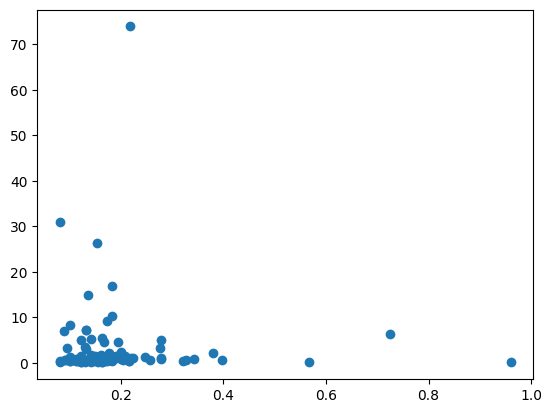

In [26]:
plt.scatter(info_no_0['Average flare duration'], info_no_0['Average percentage increase'])